In [15]:
import torch
import os


class Para:
    feature_column_start_name = 'ep_ratio_ttm' # 'VOL5'
    feature_column_end_name = 'BR' # 'AROON_DOWN'

    feature_num = 16 # 8

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    data_path = 'data/sq_space_1d_rate_20d_22-22_pre'
    model_path = 'models/model_sq_c2_s0.1_b16_lr0.001_d0.5_e10.pth'

    classification_n = 2

    month_num = len(os.listdir(data_path))

para = Para()
print(para.month_num)

1


In [16]:
import numpy as np
import torch
from my_utils.model_class import MLP
import pandas as pd

def insert_predict(df: pd.DataFrame, model_path, out_nums: int, column_name: str) -> pd.DataFrame:

    # 加载模型
    model = MLP(in_nums=para.feature_num, out_nums=out_nums, drop_p=0.5)
    model.load_state_dict(torch.load(model_path, map_location=para.device))
    model = model.to(para.device)

    # 运算
    model.eval()
    predict_tensor = model(torch.Tensor(df.loc[:, para.feature_column_start_name: para.feature_column_end_name].values).to(device=para.device))

    # 插入 predict_tensor 列
    df.insert(loc=0, column='predict_tensor_'+column_name, value=np.nan)
    # 插入 predict_return_bin 列
    df.insert(loc=0, column='predict_return_bin_'+column_name, value=np.nan)

    df['predict_tensor'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().tolist()
    df['predict_return_bin'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().argmax(1)

    return df

In [17]:
df = pd.DataFrame()

for i_csv in range(para.month_num):
    df = pd.read_csv(para.data_path +'/' + str(i_csv) + '.csv', index_col='order_book_id')

df

,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
order_book_id,,,,,,,,,,,,,,,,,,,,,
600104.XSHG,MainBoard,ConsumerDiscretionary,0,2022-01-04,-0.546925,-1.503561,1.533873,-1.503561,1.470748,1.430573,...,1.547316,0.624391,1.006166,1.476950,0.973740,1.623022,-0.294774,-0.896692,1.463897,1.486370
600104.XSHG,MainBoard,ConsumerDiscretionary,1,2022-01-05,-0.851832,-1.820236,1.888622,-1.820236,1.605696,1.399235,...,1.496550,1.592196,1.776548,1.363650,1.054210,1.416091,-0.300424,-1.157912,1.782257,2.196616
600104.XSHG,MainBoard,ConsumerDiscretionary,2,2022-01-06,-0.339180,-1.404515,1.424719,-1.404515,1.535726,1.360157,...,1.179461,0.624391,0.799053,1.190124,0.990066,1.095666,-0.242525,-1.207184,1.821097,1.581548
600104.XSHG,MainBoard,ConsumerDiscretionary,3,2022-01-07,-0.529934,-1.466508,1.492940,-1.466508,1.510440,1.323834,...,0.847274,1.592196,1.118363,1.178289,0.927271,0.999524,-0.561740,-1.216140,2.001183,1.613065
600104.XSHG,MainBoard,ConsumerDiscretionary,4,2022-01-10,-1.328283,-1.577344,1.615738,-1.577344,1.541420,1.300977,...,1.754481,1.592196,1.553182,0.951993,0.844541,0.618314,-1.062719,-1.214559,1.452054,1.405345
600104.XSHG,MainBoard,ConsumerDiscretionary,5,2022-01-11,-0.432822,-1.026142,1.015393,-1.026142,1.338308,1.242030,...,-0.008122,0.624391,0.429244,1.108662,0.821058,0.687078,-1.465100,-1.171688,1.536234,1.395209
600104.XSHG,MainBoard,ConsumerDiscretionary,6,2022-01-12,-0.154077,-1.102708,1.097258,-1.102708,1.216200,1.170428,...,0.090418,1.592196,0.746379,1.228737,0.826091,0.886572,-1.556307,-1.138771,1.263143,1.693094
600104.XSHG,MainBoard,ConsumerDiscretionary,7,2022-01-13,0.124684,-0.780671,0.756153,-0.780671,0.996449,1.069155,...,0.090418,1.592196,0.133770,1.347735,0.801769,0.922784,-1.428124,-1.062638,0.715920,0.781046
600104.XSHG,MainBoard,ConsumerDiscretionary,8,2022-01-14,0.841365,-0.383502,0.346827,-0.383502,0.676492,0.924085,...,-0.295896,0.624391,-0.564329,1.318611,0.819779,1.154998,-1.258801,-0.912592,0.857149,0.490266


In [18]:
import torchmetrics
import time
import matplotlib.pyplot as plt
import torch.nn.functional as F

precision = torchmetrics.Precision(average='none', num_classes=para.classification_n)
accuracy = torchmetrics.Accuracy()

# 插入预测数据
df = insert_predict(df=df, model_path=para.model_path, out_nums=para.classification_n, column_name='2c')

# 综合多个预测数据
df.insert(loc=0, column='predict_return_bin', value=np.nan)
df.loc[df['predict_return_bin_2c'].isin([0,]), 'predict_return_bin'] = 0
df['predict_return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['predict_return_bin'] = df['predict_return_bin'].astype('int64')

df.insert(loc=0, column='probability', value=np.nan)
for stock_id in range(len(df.index)):
    df.iloc[stock_id, 0] = F.softmax(torch.tensor(df.iloc[stock_id, df.columns.get_loc('predict_tensor_2c')]), dim=0).numpy()[0]

# 插入实际 return_bin 列
df.insert(loc=0, column='return_bin', value=np.nan)
df.loc[df['yield_rate'] > 0.0, 'return_bin'] = 0
df['return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['return_bin'] = df['return_bin'].astype('int64')

# 计算精确率
df = df.sort_values(by='probability', ascending=False)

pred = torch.tensor(df['predict_return_bin']).type(torch.LongTensor)
target = torch.tensor(df['return_bin']).type(torch.LongTensor)

print(pred)
print(target)

print(precision(preds=pred, target=target))
print(accuracy(preds=pred, target=target))

print(df.loc[df['yield_rate']>0.0, 'predict_return_bin'].value_counts())
print(df['return_bin'].value_counts())

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1])
tensor([0.4000, 0.6250])
tensor(0.5161)
0    6
1    6
Name: predict_return_bin, dtype: int64
1    19
0    12
Name: return_bin, dtype: int64


In [19]:
from rqdatac import get_price
import rqdatac

rqdatac.init()
hs300_df = get_price(order_book_ids='000300.XSHG', start_date='2022-01-01', end_date='2022-03-22', fields='close')

c:\users\millet\miniconda3\envs\torch1.8-gpu\lib\site-packages\rqdatac\client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


<AxesSubplot:xlabel='date'>

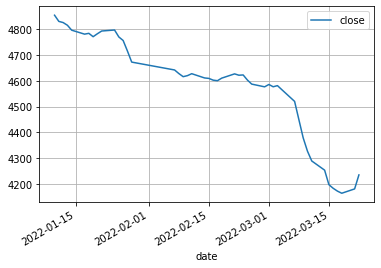

In [20]:
hs300 = hs300_df.reset_index(level='order_book_id').drop(labels='order_book_id', axis=1)
hs300.rolling(5).mean().plot(grid=True)

## 测试模型预测

In [21]:
import torch
from my_utils.model_class import MLP

model = MLP(in_nums=22, out_nums=2, drop_p=0.5)
model.load_state_dict(torch.load('models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth', map_location=para.device))
model = model.to(para.device)

model.eval()
a = model(torch.Tensor([[0.5]*22]*4).to(device=para.device))
a

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth'